#**Imports required libraries**

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import roc_curve, auc

#**Defines model/training parameters**

In [9]:
# Parameters
BATCH_SIZE = 128
NUM_EPOCHS = 20
NUM_CLASSES = 7

# Load fetch_covtype dataset
covtype = fetch_covtype()
X, y = covtype.data, covtype.target
y = y - 1  # Adjust labels to 0-based (0 to 6 instead of 1 to 7)

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to TensorFlow datasets
def create_dataset(X, y, batch_size):
    dataset = tf.data.Dataset.from_tensor_slices((X, tf.one_hot(y, depth=NUM_CLASSES)))
    dataset = dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_ds = create_dataset(X_train, y_train, BATCH_SIZE)
test_ds = create_dataset(X_test, y_test, BATCH_SIZE)

#**Builds the neural network architecture**

In [10]:
# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(54,)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, epochs=NUM_EPOCHS, validation_data=test_ds)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.6832 - loss: 0.7627 - val_accuracy: 0.7656 - val_loss: 0.5373
Epoch 2/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7539 - loss: 0.5694 - val_accuracy: 0.7895 - val_loss: 0.4923
Epoch 3/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7700 - loss: 0.5344 - val_accuracy: 0.8073 - val_loss: 0.4595
Epoch 4/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7805 - loss: 0.5108 - val_accuracy: 0.8185 - val_loss: 0.4398
Epoch 5/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7875 - loss: 0.4968 - val_accuracy: 0.8228 - val_loss: 0.4266
Epoch 6/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7932 - loss: 0.4881 - val_accuracy: 0.8296 - val_loss: 0.4199
Epoch 7/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7950 - loss: 0.4803 - val_accuracy: 0.8309 - val_loss: 0.4109
Epoch 8/20
3632/3632 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7982 - loss: 0

#**Runs the training or fitting step**

In [39]:
|
def test_random_sample():
    # انتخاب یک ایندکس تصادفی از داده‌های تست
    index = np.random.randint(0, len(X_test))

    sample = X_test[index:index+1]  # انتخاب نمونه تست
    true_label = y_test[index]

    # اعمال همان scaling
    sample = scaler.transform(sample)
    sample = tf.convert_to_tensor(sample, dtype=tf.float32)

    # پیش‌بینی مدل
    prediction = model.predict(sample, verbose=0)
    predicted_class = np.argmax(prediction[0])

    cover_types = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine',
                   'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

    true_cover_type = cover_types[true_label]
    predicted_cover_type = cover_types[predicted_class]
    is_correct = predicted_class == true_label

    print(f"Sample Index: {index}")
    print(f"True Cover Type: {true_cover_type}")
    print(f"Predicted Cover Type: {predicted_cover_type}")
    print(f"Prediction Probabilities: {prediction[0]}")
    print(f"Prediction Correct: {'Yes' if is_correct else 'No'}")

    return prediction

# مثال: تست روی یک نمونه تصادفی
test_random_sample()

Sample Index: 64300
True Cover Type: Lodgepole Pine
Predicted Cover Type: Lodgepole Pine
Prediction Probabilities: [8.9337604e-09 5.4798287e-01 1.2634601e-15 2.9353029e-30 3.0574909e-09
 4.5201713e-01 1.6607978e-32]
Prediction Correct: Yes


array([[8.9337604e-09, 5.4798287e-01, 1.2634601e-15, 2.9353029e-30,
        3.0574909e-09, 4.5201713e-01, 1.6607978e-32]], dtype=float32)

#**Collects predictions for ROC curve evaluation**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━

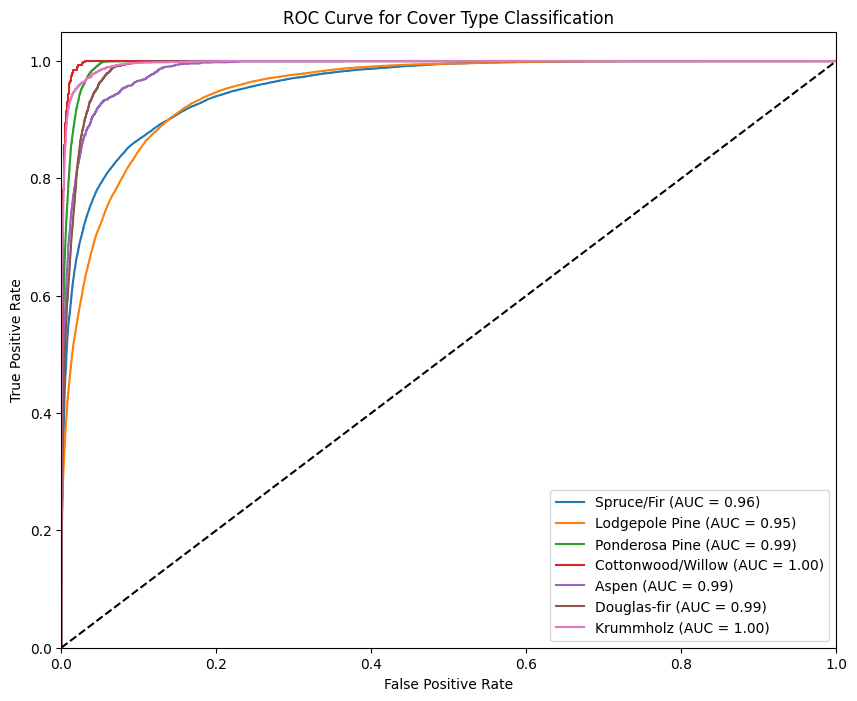

In [28]:
# Collect predictions for ROC curve
y_true = []
y_pred = []
for X_batch, y_batch in test_ds:
    preds = model.predict(X_batch)
    y_true.append(y_batch.numpy())
    y_pred.append(preds)

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Plot ROC curve for each class
cover_types = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow',
               'Aspen', 'Douglas-fir', 'Krummholz']
plt.figure(figsize=(10, 8))
for i in range(NUM_CLASSES):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{cover_types[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cover Type Classification')
plt.legend(loc="lower right")
plt.show()

**Powerd By Miracle⚡**